In [157]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [158]:
data = pd.read_csv('https://docs.google.com/spreadsheets/d/e/2PACX-1vSm22Z54SRA73TE4KC_hepwBCbJhsvpcxHulA7zWE0XlalmLP4EvpaHk3HuqOzOWNMkShKiOggGr8sF/pub?gid=1973518883&single=true&output=csv',dayfirst=True)
data.drop('No',inplace=True,axis=1)
# data = pd.read_csv('https://docs.google.com/spreadsheets/d/e/2PACX-1vR-8rNmv6kfCjGaybAaauSissXfteC-7Fjt3jRQfUm1kfA7zrTaychOwadm6vrIILB5y_hcmOmM3bvk/pub?gid=374943364&single=true&output=csv',dayfirst=True)
# data = pd.read_csv('https://docs.google.com/spreadsheets/d/e/2PACX-1vTIVDiundedynwroWdY5At3Ix8-INZXvHBBKS75uq9ryL30Qa36_GCv6o214pbLcAlDyCFfOdf-aQGs/pub?gid=718514476&single=true&output=csv',dayfirst=True)

data1=data
data = data[:83]

In [159]:
data['date'] = pd.to_datetime(data['date'],dayfirst=True)
df = data
start_date = pd.to_datetime('2023-09-01')
end_date = pd.to_datetime('2023-11-23')
filtered_df = df[(df['date'] >= start_date) & (df['date'] <= end_date)]
# Set 'Date' column as the index

data.set_index('date', inplace=True)

<ipython-input-159-1b9ea48b47b9>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['date'] = pd.to_datetime(data['date'],dayfirst=True)


In [160]:
filtered_df.tail()

,date,kwh
78,2023-11-19,0.348750
79,2023-11-20,1.186250
80,2023-11-21,1.261667
81,2023-11-22,1.225417
82,2023-11-23,1.013333


In [173]:
data1.shape
print(data1.tail(7))

          date       kwh
83  24-11-2023  1.095833
84  25-11-2023  1.600417
85  26-11-2023  0.380833
86  27-11-2023  1.073750
87  28-11-2023  1.156250
88  29-11-2023  1.112500
89  30-11-2023  1.075417


In [162]:
data.shape

(83, 1)

In [163]:
data.index

DatetimeIndex(['2023-09-01', '2023-09-02', '2023-09-04', '2023-09-05',
               '2023-09-06', '2023-09-07', '2023-09-08', '2023-09-09',
               '2023-09-10', '2023-09-11', '2023-09-12', '2023-09-13',
               '2023-09-14', '2023-09-15', '2023-09-16', '2023-09-17',
               '2023-09-18', '2023-09-19', '2023-09-20', '2023-09-21',
               '2023-09-22', '2023-09-23', '2023-09-24', '2023-09-25',
               '2023-09-26', '2023-09-27', '2023-09-28', '2023-09-29',
               '2023-09-30', '2023-10-01', '2023-10-02', '2023-10-03',
               '2023-10-04', '2023-10-05', '2023-10-06', '2023-10-07',
               '2023-10-08', '2023-10-09', '2023-10-10', '2023-10-11',
               '2023-10-12', '2023-10-13', '2023-10-14', '2023-10-15',
               '2023-10-16', '2023-10-17', '2023-10-18', '2023-10-19',
               '2023-10-20', '2023-10-21', '2023-10-22', '2023-10-23',
               '2023-10-24', '2023-10-25', '2023-10-26', '2023-10-27',
      

In [164]:
filtered_df.set_index('date',inplace=True)
data=filtered_df
df=data

In [174]:
# Data preprocessing
ts_data = df['kwh'].values

# Singular Spectral Analysis (SSA) implementation
def embed_series(series, window_size):
    n = len(series)
    embedded_series = np.array([series[i:i+window_size] for i in range(n - window_size + 1)])
    return embedded_series

def ssa_forecast(series, forecast_steps, window_size):
    embedded_series = embed_series(series, window_size)

    # Decompose the time series using Singular Value Decomposition (SVD)
    U, Sigma, Vt = np.linalg.svd(embedded_series, full_matrices=False)

    # Choose the number of singular values to use in the reconstruction
    r = min(window_size, len(series) - 1)

    # Reconstruct the time series using the selected singular values
    reconstructed_series = np.dot(U[:, :r], np.dot(np.diag(Sigma[:r]), Vt[:r, :]))

    # Forecast the next values for each step
    forecast = [np.dot(U[:, :r], np.dot(np.diag(Sigma[:r]), Vt[:r, :]))[i, -1] for i in range(-forecast_steps, 0)]

    return reconstructed_series, forecast


# Model training and forecasting
window_size = 30  # Adjust the window size as needed
forecast_steps = 7
reconstructed_series, forecast = ssa_forecast(ts_data, forecast_steps, window_size)

forecast

[1.1412500000000043,
 1.212500000000005,
 0.3487500000000022,
 1.186250000000002,
 1.2616670000000036,
 1.225417000000002,
 1.013333000000002]

In [166]:
data1.tail(7)

,date,kwh
83,24-11-2023,1.095833
84,25-11-2023,1.600417
85,26-11-2023,0.380833
86,27-11-2023,1.073750
87,28-11-2023,1.156250
88,29-11-2023,1.112500
89,30-11-2023,1.075417


In [167]:
from sklearn.metrics import mean_squared_error, r2_score

mse = mean_squared_error(data1['kwh'][-7:], forecast)
r2 = r2_score(data1['kwh'][-7:], forecast)
mse,r2

(0.027706469642999682, 0.746888951825363)

In [168]:
sarima=[1.18360399, 1.0736266 , 0.68538465, 0.85162538, 1.20469621,
       1.24711762, 1.32808328]

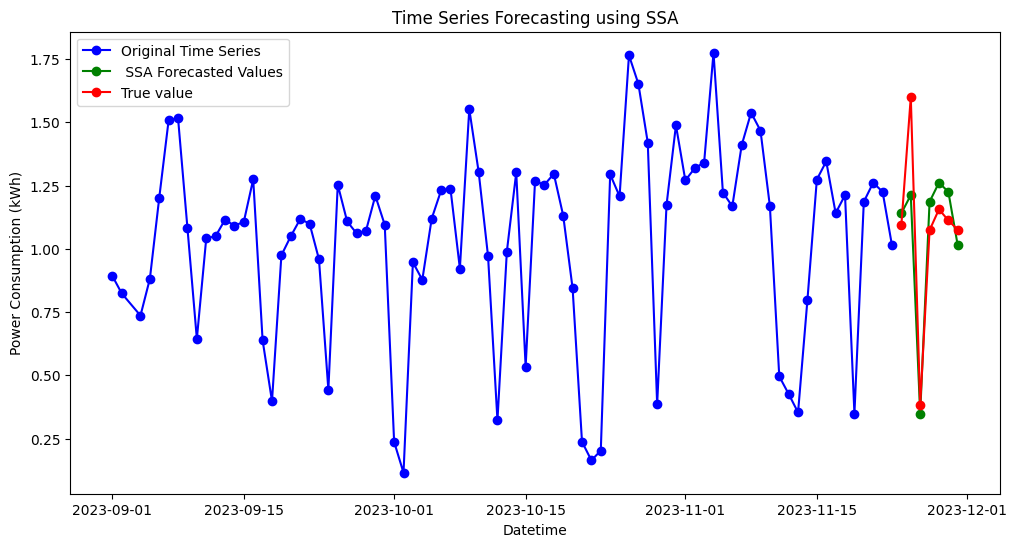

In [169]:
# Visualization
plt.figure(figsize=(12,6))

# Original time series
plt.plot(data.index,data['kwh'].values, label='Original Time Series', marker='o', color='blue')

# Reconstructed time series
#plt.plot(df.index[window_size-1:], reconstructed_series, label='Reconstructed Time Series', color='orange')

# Forecasted values
forecast_index = pd.date_range(df.index[-1] + pd.Timedelta(days=1), periods=forecast_steps, freq='D')
plt.plot(forecast_index, forecast, label=' SSA Forecasted Values', marker='o', color='green')
plt.plot(forecast_index,data1['kwh'][-7:], label='True value', marker='o', color='red')

plt.title('Time Series Forecasting using SSA')
plt.xlabel('Datetime')
plt.ylabel('Power Consumption (kWh)')
plt.legend()
plt.show()


In [170]:
#Combined SSA and SARIMA approach
from scipy.linalg import hankel, svd
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_squared_error

# Data preprocessing
ts_data = df['kwh'].values
sarima_forecast_values = []
ssa_forecast_values =[]
# Singular Spectral Analysis (SSA) implementation
def embed_series(series, window_size):
    n = len(series)
    embedded_series = np.array([series[i:i+window_size] for i in range(n - window_size + 1)])
    return embedded_series

def ssa_forecast(series, forecast_steps, window_size):
    embedded_series = embed_series(series, window_size)

    # Decompose the time series using Singular Value Decomposition (SVD)
    U, Sigma, Vt = np.linalg.svd(embedded_series, full_matrices=False)

    # Choose the number of singular values to use in the reconstruction
    r = min(window_size, len(series) - 1)

    # Reconstruct the time series using the selected singular values
    reconstructed_series = np.dot(U[:, :r], np.dot(np.diag(Sigma[:r]), Vt[:r, :]))

    # Forecast the next values for each step
    forecast = [np.dot(U[:, :r], np.dot(np.diag(Sigma[:r]), Vt[:r, :]))[i, -1] for i in range(-forecast_steps, 0)]

    return reconstructed_series, forecast

# SARIMA modeling function
def sarima_model(ts_data, order, seasonal_order):
    model = SARIMAX(ts_data, order=order, seasonal_order=seasonal_order)
    results = model.fit(disp=False)
    return results

# Function to combine SSA and SARIMA for forecasting
def ssa_sarima_forecast(ts_data, forecast_steps, window_size, sarima_order, sarima_seasonal_order):
    # Perform SSA forecasting
    _, ssa_forecast_values = ssa_forecast(ts_data, forecast_steps, window_size)
    print("SSA",ssa_forecast_values)
    # SARIMA modeling on the original time series
    sarima_results = sarima_model(ts_data, sarima_order, sarima_seasonal_order)

    # SARIMA forecasting
    sarima_forecast_values = sarima_results.forecast(steps=forecast_steps)
    print("SARIMA",sarima_forecast_values)
    # Combine SSA and SARIMA forecasts (you may adjust the weights based on your preference)
    combined_forecast = 0.5 * np.array(ssa_forecast_values) + 0.5* np.array(sarima_forecast_values)

    return combined_forecast

# Model training and forecasting using SSA-SARIMA
window_size = 15
forecast_steps = 7
sarima_order = (1, 0, 1)  # Adjust the SARIMA non-seasonal order as needed
sarima_seasonal_order = (1,0, 1, 7)  # Adjust the SARIMA seasonal order as needed

combined_forecast = ssa_sarima_forecast(ts_data, forecast_steps, window_size, sarima_order, sarima_seasonal_order)

# Print the combined forecasted values
print("Combined Forecasted values:")
print(np.round(combined_forecast, 2))


SSA [1.1412499999999977, 1.2124999999999964, 0.3487499999999985, 1.186249999999999, 1.2616669999999992, 1.2254169999999978, 1.0133329999999965]
SARIMA [1.07427458 0.98586066 0.50597816 0.8097304  1.08213093 1.11229171
 1.12788317]
Combined Forecasted values:
[1.11 1.1  0.43 1.   1.17 1.17 1.07]


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


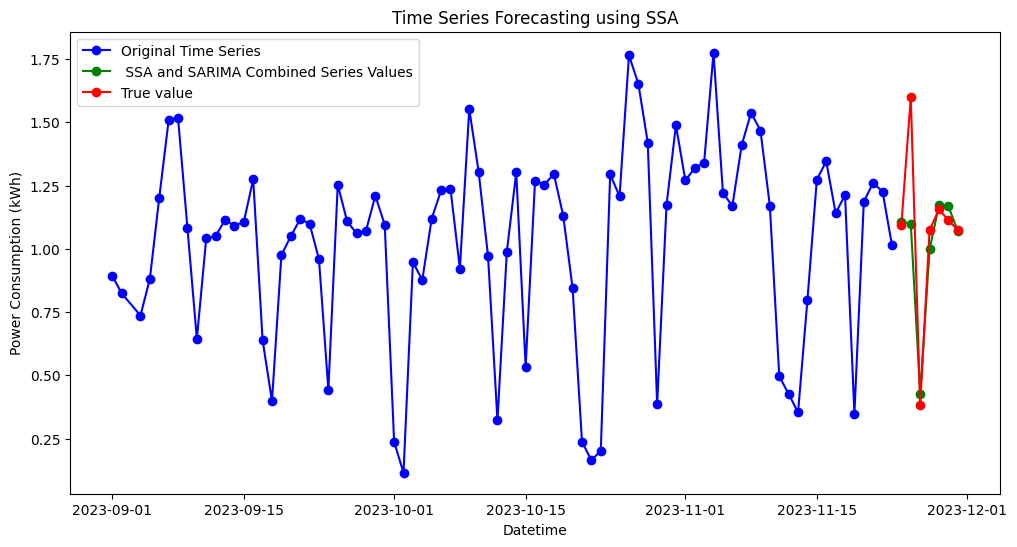

In [171]:
# Visualization
plt.figure(figsize=(12,6))

# Original time series
plt.plot(data.index,data['kwh'].values, label='Original Time Series', marker='o', color='blue')

# Reconstructed time series
#plt.plot(df.index[window_size-1:], reconstructed_series, label='Reconstructed Time Series', color='orange')

# Forecasted values
forecast_index = pd.date_range(df.index[-1] + pd.Timedelta(days=1), periods=forecast_steps, freq='D')
plt.plot(forecast_index, combined_forecast, label=' SSA and SARIMA Combined Series Values', marker='o', color='green')
plt.plot(forecast_index,data1['kwh'][-7:], label='True value', marker='o', color='red')

plt.title('Time Series Forecasting using SSA')
plt.xlabel('Datetime')
plt.ylabel('Power Consumption (kWh)')
plt.legend()
plt.show()


In [172]:
from sklearn.metrics import mean_squared_error, r2_score

mse = mean_squared_error(data1['kwh'][-7:], forecast)
mse1=mean_squared_error(data1['kwh'][-7:],combined_forecast)
mse2=mean_squared_error(data1['kwh'][-7:],sarima)
mse,mse1,mse2

(0.027706469642999682, 0.0375327179115022, 0.07308744492463912)